In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/2018-04-01.pkl
/kaggle/input/dataset/2018-04-02.pkl
/kaggle/input/dataset/2018-04-03.pkl


In [1]:
import pandas as pd
!pip install seaborn

import seaborn as sns
import numpy as np
from sklearn import set_config
set_config(display = 'diagram')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.DataFrame()
for i in range(1,4):
    dataset = pd.read_pickle(f"/kaggle/input/dataset/2018-04-0{i}.pkl")
    df1 = df1._append(dataset)
df1



,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,...,1.0,57.160000,1.0,57.160000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,...,1.0,81.510000,1.0,81.510000,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,...,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,...,1.0,64.490000,1.0,64.490000,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,...,1.0,50.990000,1.0,50.990000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,28813,2018-04-03 23:54:47,3773,3642,31.75,258887,2,0,0,0,...,18.0,19.272778,18.0,19.272778,0.0,0.0,0.0,0.0,0.0,0.0
28814,28814,2018-04-03 23:55:28,3103,4847,21.97,258928,2,0,0,0,...,8.0,16.037500,8.0,16.037500,0.0,0.0,0.0,0.0,0.0,0.0
28815,28815,2018-04-03 23:56:25,4405,6859,11.08,258985,2,0,0,0,...,9.0,62.087778,9.0,62.087778,0.0,0.0,0.0,0.0,0.0,0.0
28816,28816,2018-04-03 23:57:19,1206,6875,67.38,259039,2,0,0,0,...,19.0,59.906316,19.0,59.906316,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df1 = pd.read_pickle('/kaggle/input/fraud-transaction-detection/fraud-transaction-detection.pkl')

In [3]:
df1.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO'],
      dtype='object')

In [4]:
df1.isnull().sum()

TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

In [5]:
df1.duplicated().sum()

0

In [6]:
df1.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1754150    False
1754151    False
1754152    False
1754153    False
1754154    False
Length: 1725524, dtype: bool

In [7]:
df1.dtypes

TRANSACTION_ID                int64
TX_DATETIME          datetime64[ns]
CUSTOMER_ID                  object
TERMINAL_ID                  object
TX_AMOUNT                   float64
TX_TIME_SECONDS              object
TX_TIME_DAYS                 object
TX_FRAUD                      int64
TX_FRAUD_SCENARIO             int64
dtype: object

<Axes: >

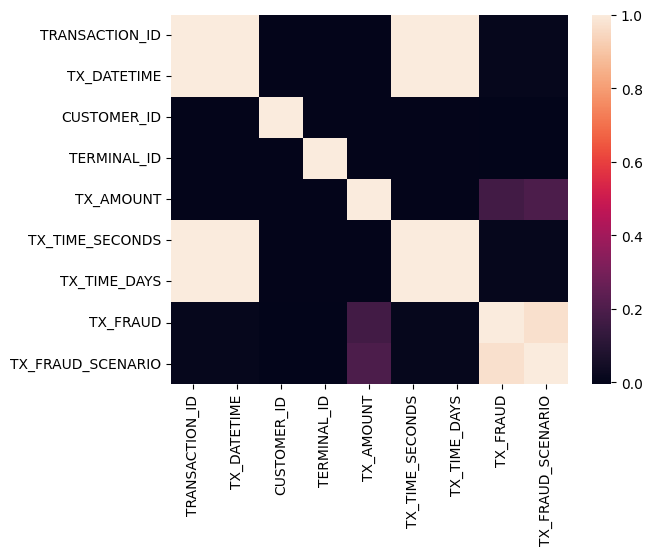

In [8]:
sns.heatmap(df1.corr())

In [39]:
df1.head()
df1['TX_MONTH'] = df1['TX_DATETIME'].dt.month
df1['TX_day'] = df1['TX_DATETIME'].dt.day
df1['TX_TIME'] =df1['TX_DATETIME'].dt.hour
# df1['TX_TIME_NIGHT'] = 1 if df1['TX_TIME']>= 20 else(1 if df1['TX_TIME'] <= 6, else 0)




In [10]:
! pip install ydata-profiling
from ydata_profiling import ProfileReport
prof = ProfileReport(df1)
prof.to_file(output_file='output.html')


INFO: pip is looking at multiple versions of ydata-profiling to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement numpy<1.26,>=1.16.0 (from ydata-profiling) (from versions: none)
ERROR: No matching distribution found for numpy<1.26,>=1.16.0


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
df = df1
df.columns

Index(['TX_DATETIME', 'CUSTOMER_ID', 'TX_AMOUNT', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO', 'TX_MONTH', 'TX_day', 'TX_TIME'],
      dtype='object')

In [41]:
df.drop(['TX_TIME_SECONDS','TERMINAL_ID','TX_TIME_DAYS','TRANSACTION_ID','TX_TIME_DAYS'],axis = 1, inplace  = True)

KeyError: "['TX_TIME_SECONDS', 'TERMINAL_ID', 'TX_TIME_DAYS', 'TRANSACTION_ID', 'TX_TIME_DAYS'] not found in axis"

In [22]:
df.drop((df.iloc[:,8:16]),axis = 1, inplace  = True)

In [42]:
import numpy as np
df['TX_AMOUNT']= df.TX_AMOUNT.apply(np.round)
df['TX_AMOUNT']= df.TX_AMOUNT.round(0)
df['TX_AMOUNT']= df.TX_AMOUNT.astype(int)

In [43]:
df

,TX_DATETIME,CUSTOMER_ID,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO,TX_MONTH,TX_day,TX_TIME
0,2018-04-01 00:00:31,596,57,0,0,4,1,0
1,2018-04-01 00:02:10,4961,82,0,0,4,1,0
2,2018-04-01 00:07:56,2,146,0,0,4,1,0
3,2018-04-01 00:09:29,4128,64,0,0,4,1,0
4,2018-04-01 00:10:34,927,51,0,0,4,1,0
...,...,...,...,...,...,...,...,...
1754150,2018-09-30 23:56:36,161,54,0,0,9,30,23
1754151,2018-09-30 23:57:38,4342,1,0,0,9,30,23
1754152,2018-09-30 23:58:21,618,7,0,0,9,30,23
1754153,2018-09-30 23:59:52,4056,55,0,0,9,30,23


In [44]:
X = df.drop(['TX_FRAUD','TX_DATETIME'],axis = 1)
y = df.TX_FRAUD


In [52]:
X['CUSTOMER_ID'] = X.CUSTOMER_ID.astype(int)

In [45]:
y.value_counts()

TX_FRAUD
0    1711092
1      14432
Name: count, dtype: int64

In [46]:
df.TX_AMOUNT

0           57
1           82
2          146
3           64
4           51
          ... 
1754150     54
1754151      1
1754152      7
1754153     55
1754154     24
Name: TX_AMOUNT, Length: 1725524, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [54]:
X_train.info()
X_train

<class 'pandas.core.frame.DataFrame'>
Index: 1156101 entries, 396638 to 121958
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   CUSTOMER_ID        1156101 non-null  int64
 1   TX_AMOUNT          1156101 non-null  int64
 2   TX_FRAUD_SCENARIO  1156101 non-null  int64
 3   TX_MONTH           1156101 non-null  int32
 4   TX_day             1156101 non-null  int32
 5   TX_TIME            1156101 non-null  int32
dtypes: int32(3), int64(3)
memory usage: 48.5 MB


,CUSTOMER_ID,TX_AMOUNT,TX_FRAUD_SCENARIO,TX_MONTH,TX_day,TX_TIME
396638,4291,86,0,5,12,9
704453,4240,46,0,6,13,11
882946,4052,11,0,7,2,3
113113,241,82,0,4,12,16
624820,3673,76,0,6,5,6
...,...,...,...,...,...,...
259178,1064,105,0,4,28,1
1433541,1911,24,0,8,28,12
131932,439,37,0,4,14,15
680577,4440,96,0,6,10,21


In [55]:
import datetime
today = datetime.datetime.today()
today

datetime.datetime(2024, 6, 22, 8, 41, 53, 266316)

In [56]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [57]:
trf = FunctionTransformer(func = np.log1p)

In [58]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transfored = trf.transform(X_test)

Text(0.5, 1.0, 'TX_amount')

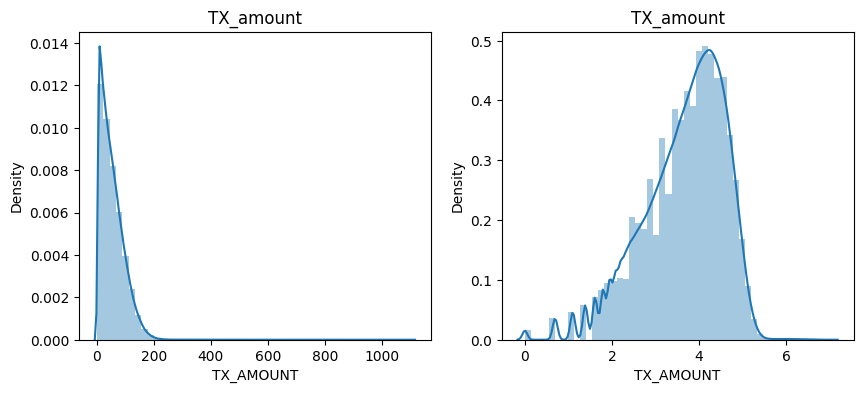

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,4))
plt.subplot(121)
sns.distplot(X_train['TX_AMOUNT'])
plt.title('TX_amount')

plt.subplot(122)
sns.distplot(X_train_transformed['TX_AMOUNT'])
plt.title('TX_amount')

Text(0.5, 1.0, 'TX_amount')

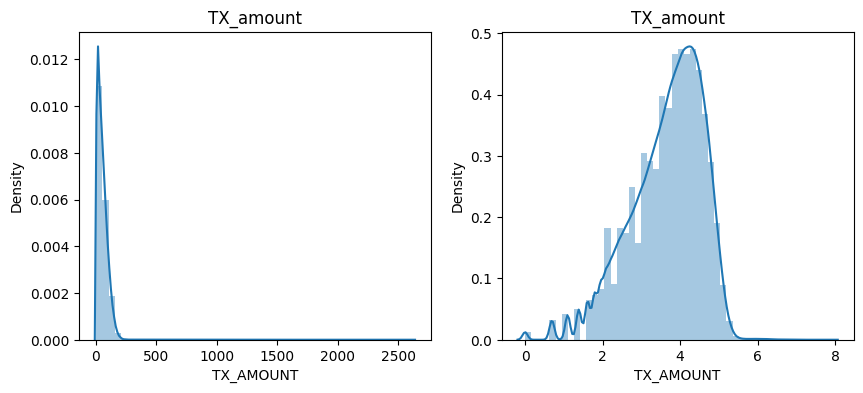

In [60]:
plt.figure(figsize = (10,4))
plt.subplot(121)
sns.distplot(X_test['TX_AMOUNT'])
plt.title('TX_amount')

plt.subplot(122)
sns.distplot(X_test_transfored['TX_AMOUNT'])
plt.title('TX_amount')

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler =scaler.transform(X_train)

In [62]:
X_train_scaler

array([[ 1.23593732,  0.76799801, -0.08933946, -0.87681831, -0.40395292,
        -0.49461425],
       [ 1.20066097, -0.18013602, -0.08933946, -0.2915186 , -0.28842066,
        -0.09924466],
       [ 1.07062264, -1.0097533 , -0.08933946,  0.29378112, -1.55927546,
        -1.68072303],
       ...,
       [-1.42846495, -0.39346618, -0.08933946, -1.46211803, -0.17288841,
         0.69149453],
       [ 1.33899961,  1.00503152, -0.08933946, -0.2915186 , -0.63501742,
         1.87760331],
       [ 0.68604121, -0.51198294, -0.08933946, -1.46211803, -0.28842066,
         0.69149453]])

In [63]:
df.head()

,TX_DATETIME,CUSTOMER_ID,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO,TX_MONTH,TX_day,TX_TIME
0,2018-04-01 00:00:31,596,57,0,0,4,1,0
1,2018-04-01 00:02:10,4961,82,0,0,4,1,0
2,2018-04-01 00:07:56,2,146,0,0,4,1,0
3,2018-04-01 00:09:29,4128,64,0,0,4,1,0
4,2018-04-01 00:10:34,927,51,0,0,4,1,0


In [64]:
from sklearn.preprocessing import PowerTransformer
X_train

,CUSTOMER_ID,TX_AMOUNT,TX_FRAUD_SCENARIO,TX_MONTH,TX_day,TX_TIME
396638,4291,86,0,5,12,9
704453,4240,46,0,6,13,11
882946,4052,11,0,7,2,3
113113,241,82,0,4,12,16
624820,3673,76,0,6,5,6
...,...,...,...,...,...,...
259178,1064,105,0,4,28,1
1433541,1911,24,0,8,28,12
131932,439,37,0,4,14,15
680577,4440,96,0,6,10,21


In [65]:
pt = PowerTransformer()
X_train_pt = pt.fit_transform(X_train)
X_test_pt = pt.transform(X_test)

In [66]:
X_train_transformed1 = pd.DataFrame(X_train_pt,columns = X_train.columns)
X_test_transformed1 = pd.DataFrame(X_test_pt,columns = X_train.columns)

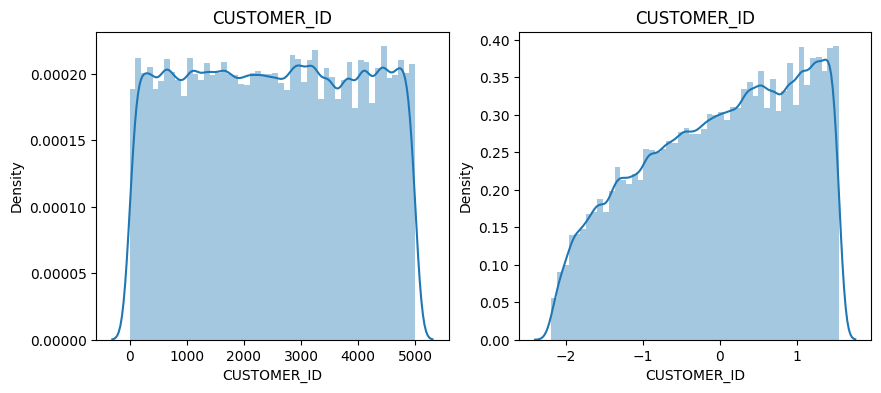

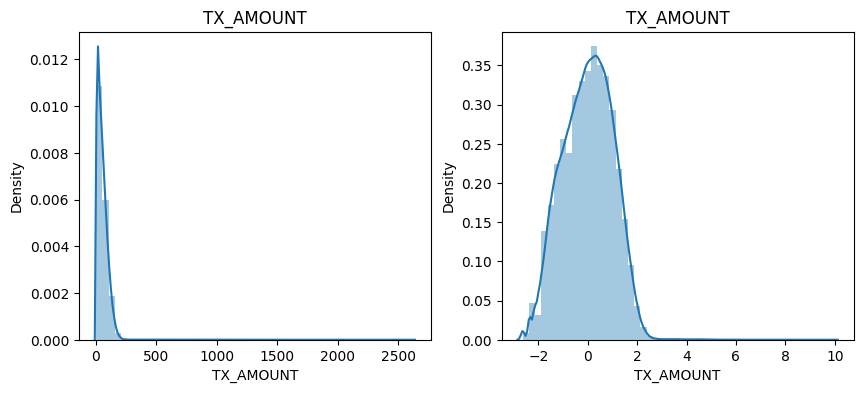

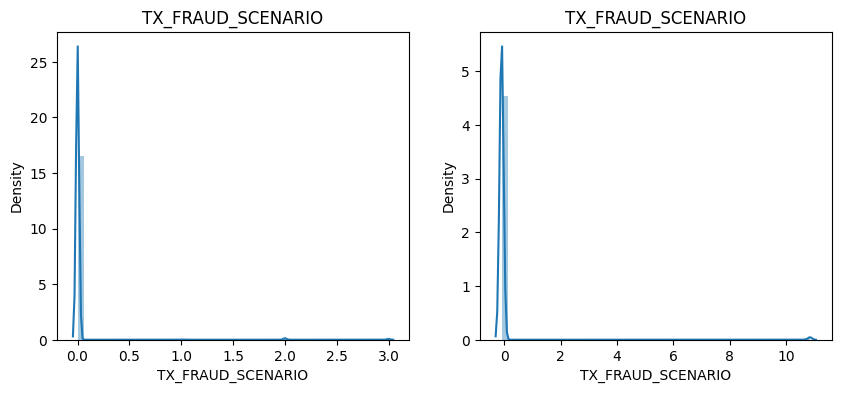

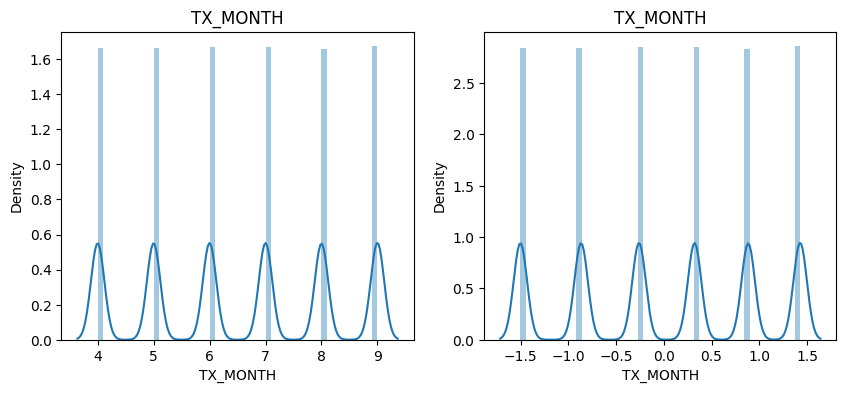

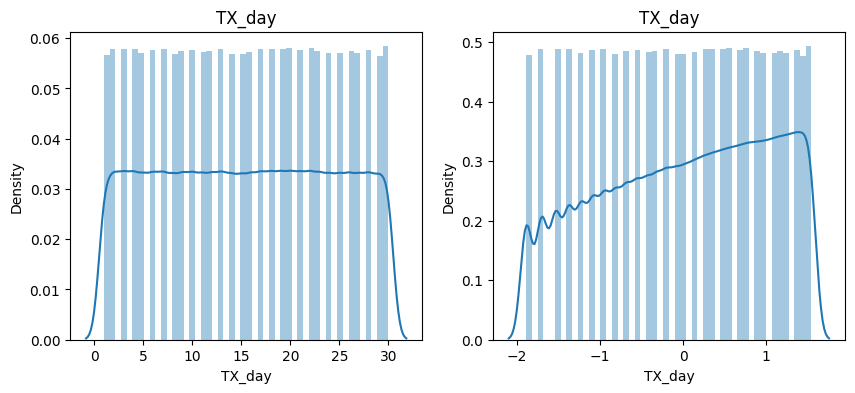

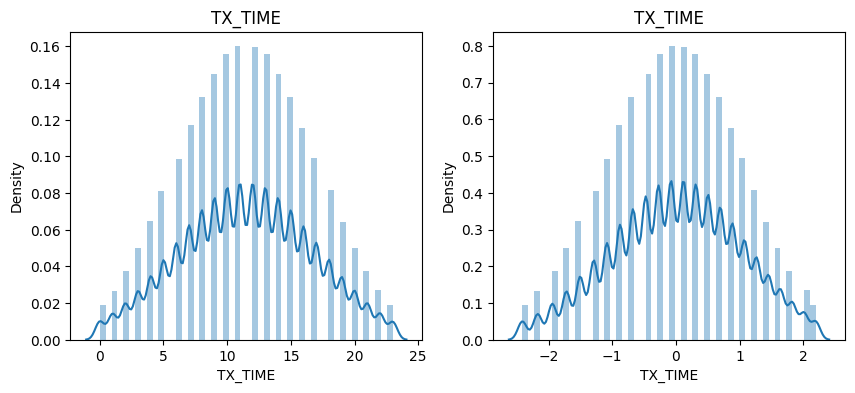

In [67]:
for col in X_train_transformed1.columns:
    plt.figure(figsize = (10,4))
    plt.subplot(121)
    sns.distplot(X_test[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_test_transformed1[col])
    plt.title(col)

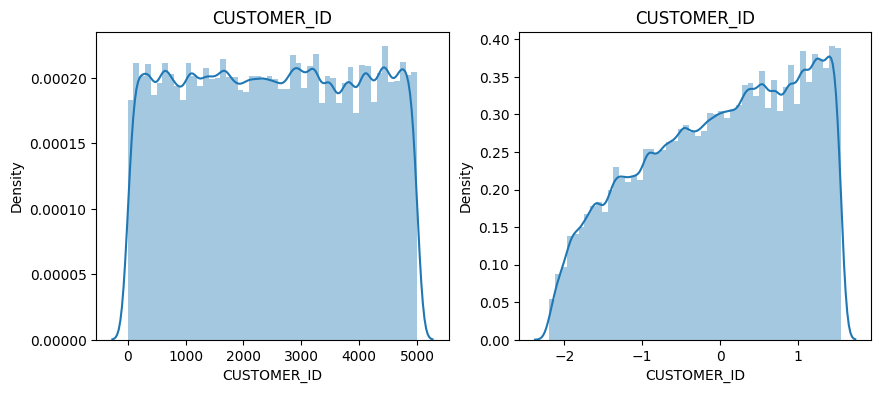

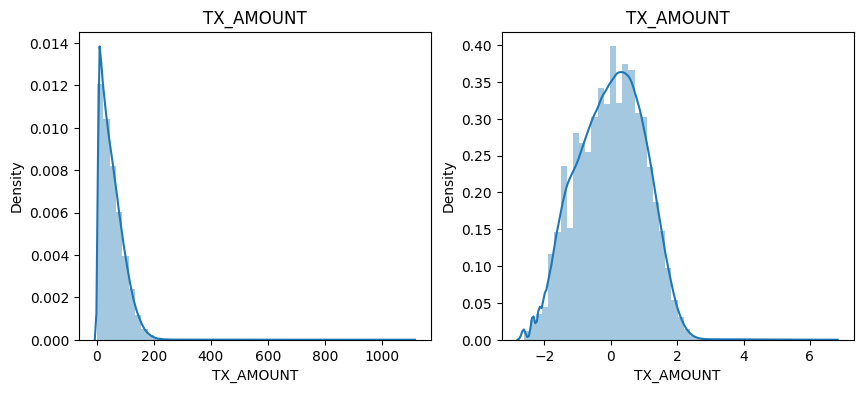

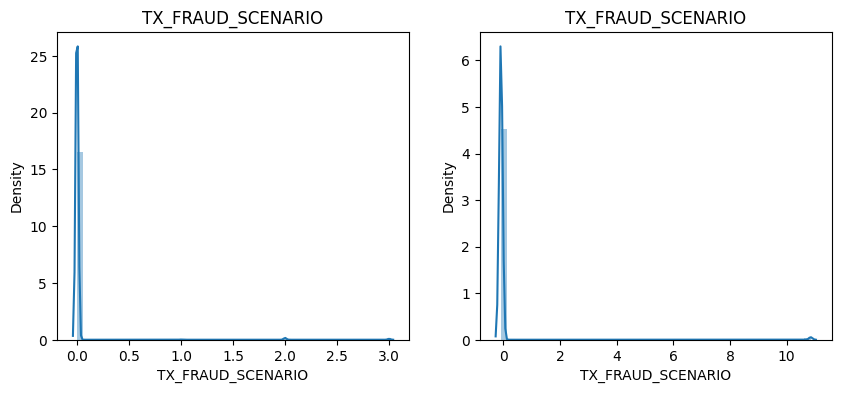

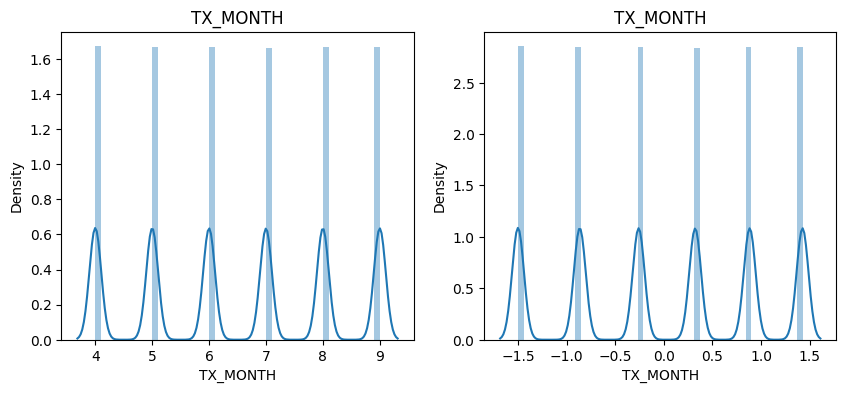

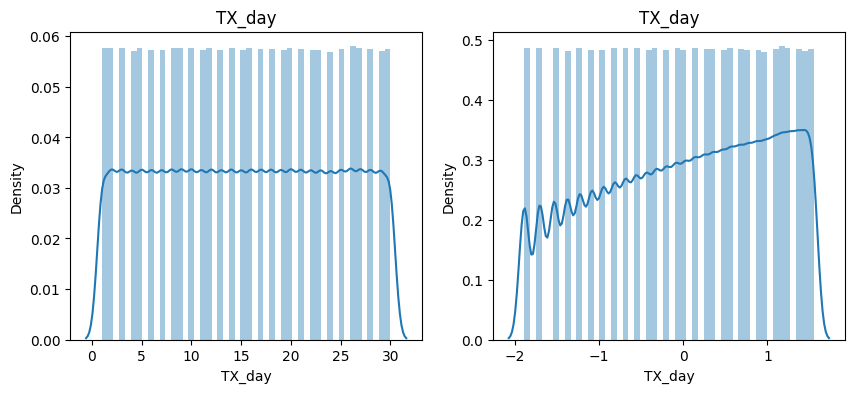

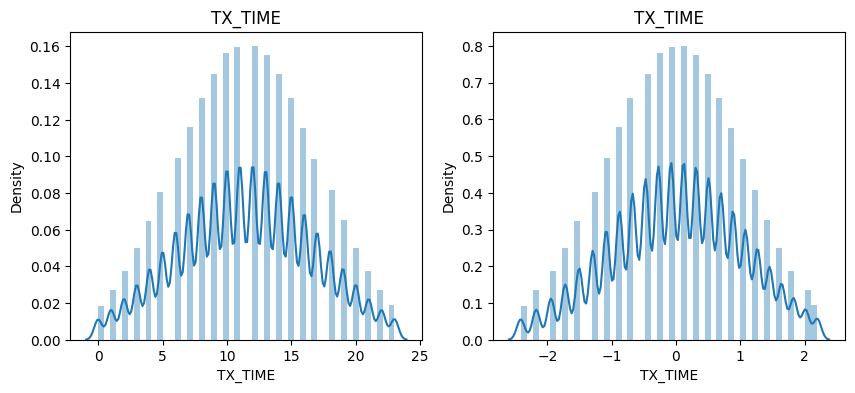

In [68]:
for col in X_train_transformed1.columns:
    plt.figure(figsize = (10,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed1[col])
    plt.title(col)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train_transformed1)
X_test_scaler =scaler.transform(X_test_transformed1)

In [70]:
# Installing Machine models which could perform well over the same classifier data.
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
!pip install Xgboost
import xgboost as xb
from xgboost import XGBClassifier


In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [72]:
## Model Training Automation
models={
    'Random Forest':RandomForestClassifier(),
    'Logistic Regression':LogisticRegressionCV(),
    'Decision Tree':DecisionTreeClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'xgboost': XGBClassifier()

}

In [73]:
# Evaluare_model function to find out the best model which having highest Accuracy.
def Evaluate_model(X_train,y_train,X_test,y_test,models):
  report = {}
  report2 = {}
  report1 = {}
    
  for i in range(len(models)):
    model = list(models.values())[i]
    #train model
    model.fit(X_train,y_train)


    #predict Testing data
    y_test_pred = model.predict(X_test)

    #get accuracy for test data prediction
    test_model_score_con = confusion_matrix(y_test,y_test_pred)
    test_model_score_acc = accuracy_score(y_test,y_test_pred)
    test_model_score_clas = print(classification_report(y_test,y_test_pred))
    report[list(models.keys())[i]] = test_model_score_acc
    report1[list(models.keys())[i]] = test_model_score_con
    report2[list(models.keys())[i]] = test_model_score_clas

  return report,report2,report1

In [74]:
result = Evaluate_model(X_train_scaler,y_train,X_test_scaler,y_test,models)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    564730
           1       1.00      1.00      1.00      4693

    accuracy                           1.00    569423
   macro avg       1.00      1.00      1.00    569423
weighted avg       1.00      1.00      1.00    569423

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    564730
           1       1.00      1.00      1.00      4693

    accuracy                           1.00    569423
   macro avg       1.00      1.00      1.00    569423
weighted avg       1.00      1.00      1.00    569423

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    564730
           1       1.00      1.00      1.00      4693

    accuracy                           1.00    569423
   macro avg       1.00      1.00      1.00    569423
weighted avg       1.00      1.00      1.00    569423

              preci

In [75]:
result[1]

{'Random Forest': None,
 'Logistic Regression': None,
 'Decision Tree': None,
 'Adaboost': None,
 'xgboost': None}

In [76]:
y_train.value_counts()

TX_FRAUD
0    1146362
1       9739
Name: count, dtype: int64

In [77]:
y_test.value_counts()

TX_FRAUD
0    564730
1      4693
Name: count, dtype: int64

In [78]:
log = LogisticRegressionCV()
model = log.fit(X_train_scaler,y_train)
y_pred = log.predict(X_test_scaler)

In [79]:
print(confusion_matrix(y_test,y_pred))

[[564730      0]
 [     0   4693]]


In [80]:
np.mean(cross_val_score(log,X_train_scaler,y_train,scoring = 'accuracy',cv = 5))

1.0

In [81]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [174]:
 model = pickle.load(open('model.pkl','rb'))

In [218]:
x_data = X_test_transformed1.iloc[6237:6238,:]

In [219]:
x_data

,CUSTOMER_ID,TX_AMOUNT,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT
6237,1.085605,1.339888,31.05479,-0.701511,-0.460244


In [220]:
model.predict(x_data)

array([1])

In [213]:
y_test2[y_test2['TX_FRAUD'] == 1]


,index,TX_FRAUD
511,26719,1
732,11724,1
1834,28692,1
2070,22577,1
2295,19200,1
4246,11918,1
4419,21532,1
5039,14762,1
5059,25037,1
6237,21152,1


In [212]:
y_test2 = pd.DataFrame(y_test)
y_test2.reset_index(inplace = True)

In [214]:
y_test2

,index,TX_FRAUD
0,7821,0
1,23731,0
2,21388,0
3,10152,0
4,11680,0
...,...,...
9505,26176,0
9506,5352,0
9507,5557,0
9508,4411,0


In [180]:
X_test_transformed1

,CUSTOMER_ID,TX_AMOUNT,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT
0,-1.266253,-0.837368,-0.032201,1.425495,-0.460244
1,-1.180177,1.483972,-0.032201,-0.701511,-0.460244
2,0.200050,1.107262,-0.032201,-0.701511,-0.460244
3,0.879623,1.007704,-0.032201,-0.701511,2.172761
4,-1.719934,-0.369535,-0.032201,-0.701511,-0.460244
...,...,...,...,...,...
9505,1.321950,-0.585680,-0.032201,-0.701511,-0.460244
9506,-1.246533,0.454799,-0.032201,1.425495,-0.460244
9507,-0.356419,0.476371,-0.032201,1.425495,-0.460244
9508,-1.410699,1.788567,-0.032201,1.425495,-0.460244


In [121]:
X_train_transformed1

,CUSTOMER_ID,TX_AMOUNT,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT
0,0.538231,0.047871,-0.032201,-0.701511,-0.460244
1,1.266220,0.249773,-0.032201,-0.701511,-0.460244
2,0.794675,-0.208850,-0.032201,-0.701511,2.172761
3,0.242987,-0.208850,-0.032201,-0.701511,-0.460244
4,1.063920,1.607252,-0.032201,1.425495,-0.460244
...,...,...,...,...,...
19303,-0.680493,-0.748583,-0.032201,-0.701511,-0.460244
19304,-0.060841,0.868141,-0.032201,1.425495,-0.460244
19305,-0.131186,0.903818,-0.032201,1.425495,2.172761
19306,1.108892,1.090951,-0.032201,-0.701511,-0.460244


In [122]:
X_test_scaler

array([[-1.26625274, -0.83736765, -0.03220115,  1.42549471, -0.46024397],
       [-1.18017694,  1.48397178, -0.03220115, -0.70151084, -0.46024397],
       [ 0.20005012,  1.10726239, -0.03220115, -0.70151084, -0.46024397],
       ...,
       [-0.356419  ,  0.47637095, -0.03220115,  1.42549471, -0.46024397],
       [-1.41069943,  1.7885668 , -0.03220115,  1.42549471, -0.46024397],
       [-0.65141235, -0.30342297, -0.03220115, -0.70151084, -0.46024397]])

In [129]:
y_test.reindex

<bound method DataFrame.reindex of        TX_FRAUD
7821          0
23731         0
21388         0
10152         0
11680         0
...         ...
26176         0
5352          0
5557          0
4411          0
24310         0

[9510 rows x 1 columns]>

Now using the smote techinque to balance the data set, As we getting very hight accouracy on imbalance dataset in that case may be our modle has overfitted,So check with smote 

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

In [84]:
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

In [87]:
y_resampled_smote.value_counts()

TX_FRAUD
0    1146362
1    1146362
Name: count, dtype: int64

In [88]:
X_resampled_smote

,CUSTOMER_ID,TX_AMOUNT,TX_FRAUD_SCENARIO,TX_MONTH,TX_day,TX_TIME
0,4291,86,0,5,12,9
1,4240,46,0,6,13,11
2,4052,11,0,7,2,3
3,241,82,0,4,12,16
4,3673,76,0,6,5,6
...,...,...,...,...,...,...
2292719,988,231,3,5,16,13
2292720,1570,64,2,7,3,17
2292721,140,289,3,5,19,17
2292722,3811,342,3,5,8,12


In [91]:
pt = PowerTransformer()
X_train_st_pt = pt.fit_transform(X_resampled_smote)
X_test_st_pt = pt.transform(X_test)
X_train_transformed2 = pd.DataFrame(X_train_pt,columns = X_train.columns)
X_test_transformed2 = pd.DataFrame(X_test_pt,columns = X_train.columns)

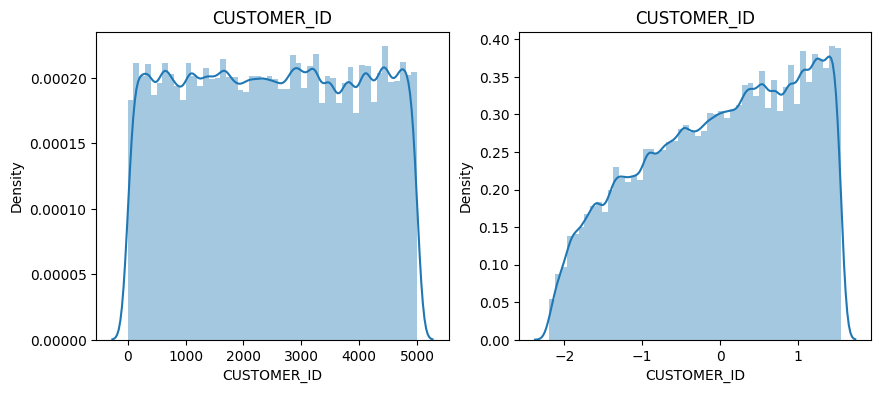

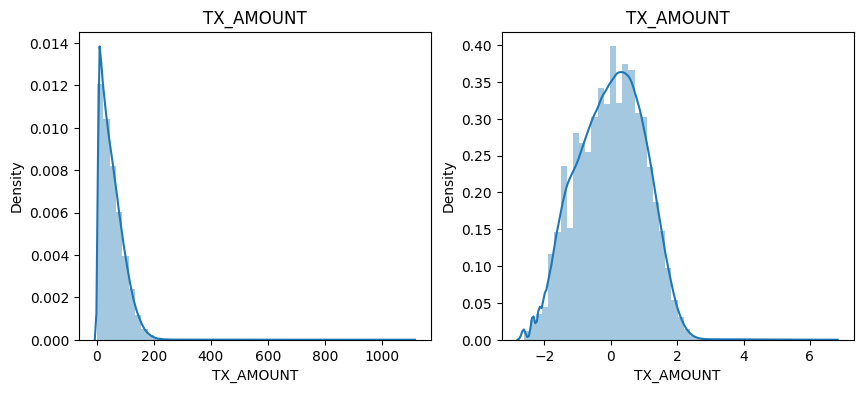

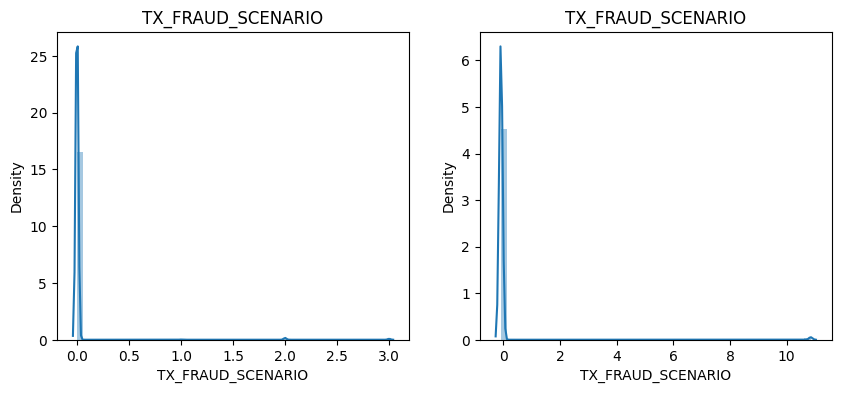

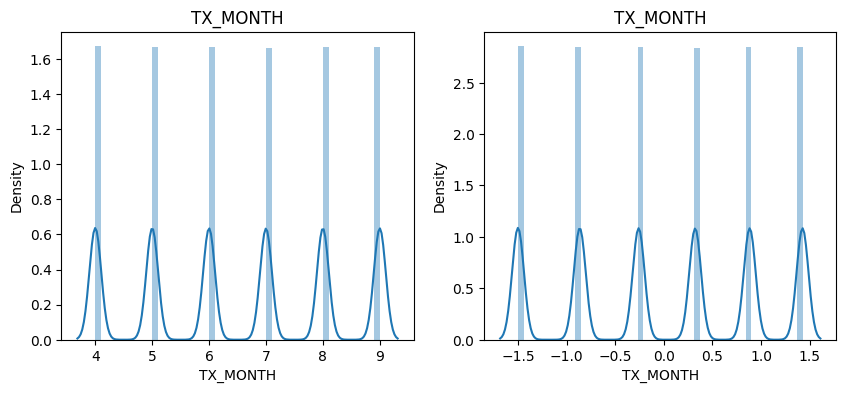

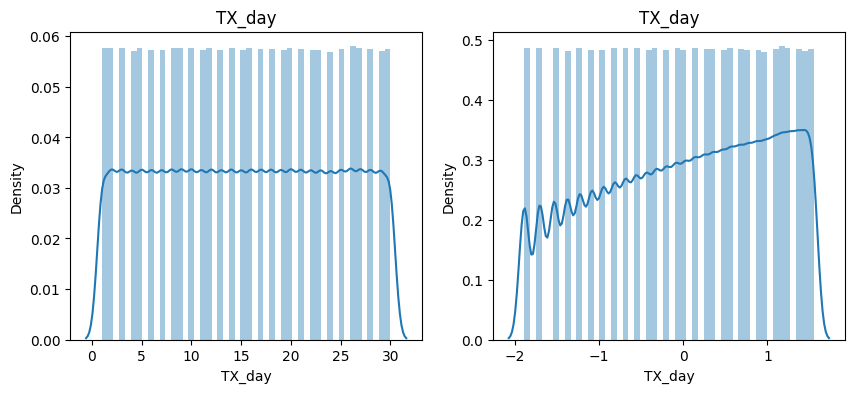

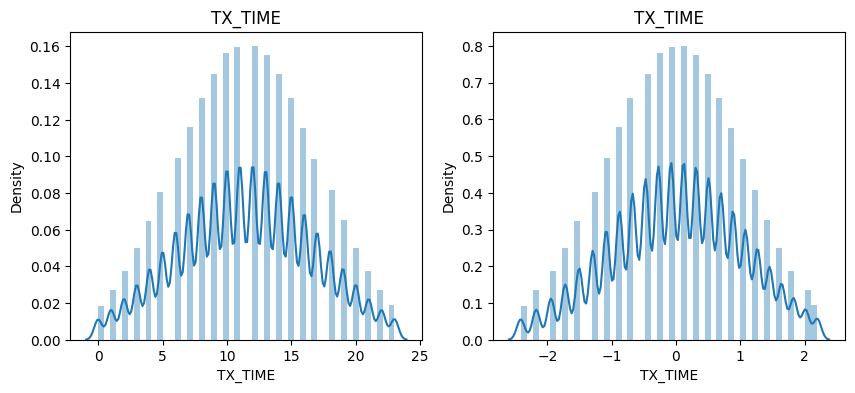

In [92]:
for col in X_train_transformed1.columns:
    plt.figure(figsize = (10,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train_transformed2)
X_test_scaler =scaler.transform(X_test_transformed2)

In [94]:
log = LogisticRegressionCV()
model = log.fit(X_resampled_smote,y_resampled_smote)
y_pred = log.predict(X_test_scaler)
print(confusion_matrix(y_test,y_pred))
np.mean(cross_val_score(log,X_train_scaler,y_train,scoring = 'accuracy',cv = 5))

[[564730      0]
 [     0   4693]]


1.0

In [95]:
import pickle
pickle.dump(model,open('model1.pkl','wb'))